In [2]:
from IPython.display import Image, display
import networkx as nx
from tempfile import mkstemp
from collections import defaultdict
import os

def to_graph(delta):
    G = nx.DiGraph()
    edges = defaultdict(set)
    for k, v in delta.items():
        edges[(k[0],v)].add(k[1])
    for k, v in edges.items():
        G.add_edge(k[0], k[1], label=','.join(v))
    return G

def draw_graph(G):
    ag = nx.drawing.nx_agraph.to_agraph(G)
    ag.layout('dot')
    fd, name = mkstemp(suffix='.png')
    os.close(fd)
    ag.draw(name)
    display(Image(name))
    return name

In [3]:
class DFA:
    # alphabet, set of state implicit 
    def __init__(self, delta, accepting_states, starting_state):
        self.delta = delta
        self.s = starting_state
        self.A = accepting_states
        self.cur = self.s
        
    def process(self, c):
        self.cur = self.delta[(self.cur, c)]
        
    def accepts(self, s):
        self.cur = self.s
        for c in s:
            self.process(c)
        return (self.cur in self.A)

In [4]:
delta_odd_ones = {
    ('even1','1') : 'odd1',
    ('even1','0') : 'even1',
    ('odd1', '1') : 'even1', 
    ('odd1', '0') : 'odd1'
}

In [5]:
DFA_odd_ones = DFA(delta_odd_ones, { 'odd1' }, 'even1')

In [6]:
DFA_odd_ones.cur

'even1'

In [7]:
DFA_odd_ones.process('0')

In [8]:
DFA_odd_ones.cur

'even1'

In [9]:
DFA_odd_ones.process('1')

In [10]:
DFA_odd_ones.cur

'odd1'

In [11]:
DFA_odd_ones.accepts('1011')

True

In [12]:
DFA_odd_ones.accepts('10111')

False

Create a DFA that finds all binary strings divisible by 5

States = remainder of current prefix when divided by 5
Transitions: 
   (x)1 [in binary] = 2*[x]+1
   110b = 6
   6 % 5 = 1
   1101 = 2*6 + 1 = 13
   13 % 5 = 3 = 2*(1) + 1
   
   1100 = 2*6 = 12
   12 % 5 = 2 = 2*(1)
   
 If remainder of x is k, then remainder of x1 is 2*k + 1
 and reminader of x0 is 2*k
 

In [13]:
mod5_delta = {}
for i in [0,1,2,3,4]:
    mod5_delta[(i,'0')] = (i*2) % 5
    mod5_delta[(i,'1')] = (i*2 + 1) % 5
mod5_delta

{(0, '0'): 0,
 (0, '1'): 1,
 (1, '0'): 2,
 (1, '1'): 3,
 (2, '0'): 4,
 (2, '1'): 0,
 (3, '0'): 1,
 (3, '1'): 2,
 (4, '0'): 3,
 (4, '1'): 4}

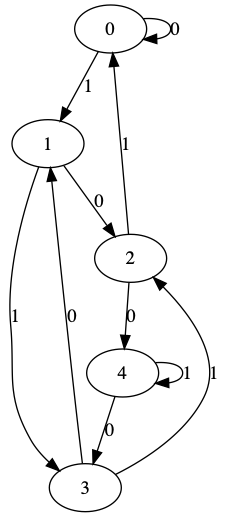

'/var/folders/bj/jq9qlqz11y7_5mypzzxtp8_40000gn/T/tmpgh4x24tn.png'

In [15]:
draw_graph(to_graph({(str(k[0]),k[1]): str(v) for k,v  in mod5_delta.items()}))

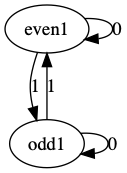

'/var/folders/bj/jq9qlqz11y7_5mypzzxtp8_40000gn/T/tmp3ow2x1t2.png'

In [16]:
draw_graph(to_graph(delta_odd_ones))

In [17]:
DFA_mod5 = DFA(mod5_delta, {0}, 0)

In [18]:
DFA_mod5.accepts('110')

False

In [19]:
DFA_mod5.accepts('101')

True